## Deep Learning with Tensorflow 2.0 Tutorial - Getting Started with Tensorflow 2.0 and Keras for Beginners

### What is Tensorflow?

Tensorflow architecture works in three parts:

- Preprocessing the data
- Build the model
- Train and estimate the model

I am assuming that you know a little about the machine learning and deep learning

### Why Every Data Scientist Learn Tensorflow 2.x not Tensorflow 1.x

- API Cleanup
- Eager execution
- No more globals
- Functions, not sessions (session.run())
- Use Keras layers and models to manage variables
- It is faster
- It takes less space
- More consistent
- and many more, watch Google I/O https://www.youtube.com/watch?v=lEljKc9ZtU8
- Github Link: https://github.com/tensorflow/tensorflow/releases

 ##### !pip install tensorflow==2.0.0-rc0 
 ##### !pip install tensorflow-gpu==2.0.0-rc0

## Import the Fashion MNIST dataset

[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.0.0-rc0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist = keras.datasets.fashion_mnist

In [5]:
type(mnist)

tensorflow.python.util.module_wrapper.TFModuleWrapper

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [8]:
np.max(X_train)

255

In [9]:
np.mean(X_train)

72.94035223214286

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

#### Data Exploration

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

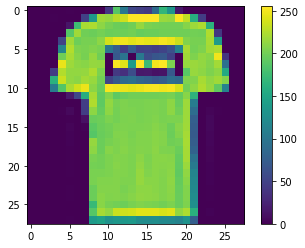

In [14]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [15]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
X_train = X_train/255.0

In [17]:
X_test = X_test/255.0

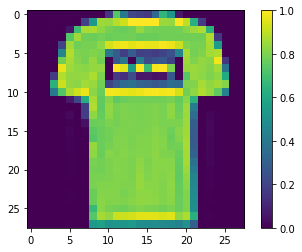

In [18]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

### Build the model with TF 2.0 

In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [22]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### model compilation
- Loss Function
- Optimizer
- Metrics

In [40]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [41]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = 10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 11s 225us/sample - loss: 0.2345 - accuracy: 0.9132 - val_loss: 0.3402 - val_accuracy: 0.8868
Epoch 2/10
48000/48000 [==============================] - 10s 213us/sample - loss: 0.2280 - accuracy: 0.9152 - val_loss: 0.3546 - val_accuracy: 0.8828
Epoch 3/10
48000/48000 [==============================] - 9s 190us/sample - loss: 0.2223 - accuracy: 0.9163 - val_loss: 0.3384 - val_accuracy: 0.8910
Epoch 4/10
48000/48000 [==============================] - 10s 203us/sample - loss: 0.2139 - accuracy: 0.9192 - val_loss: 0.3634 - val_accuracy: 0.8849
Epoch 5/10
48000/48000 [==============================] - 10s 201us/sample - loss: 0.2102 - accuracy: 0.9212 - val_loss: 0.3574 - val_accuracy: 0.8861
Epoch 6/10
48000/48000 [==============================] - 9s 188us/sample - loss: 0.2027 - accuracy: 0.9233 - val_loss: 0.3449 - val_accuracy: 0.8913
Epoch 7/10
48000/48000 [======================

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
y_pred = model.predict_classes(X_test)

In [44]:
accuracy_score(y_test, y_pred)

0.8803

In [45]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [46]:
pred = model.predict(X_test)

In [47]:
pred

array([[8.1823672e-19, 6.6098229e-19, 2.7788203e-17, ..., 9.0542826e-04,
        2.1719045e-10, 9.9902534e-01],
       [1.4387699e-06, 9.0378749e-20, 9.9994195e-01, ..., 9.5664438e-38,
        9.2501338e-17, 5.2225751e-24],
       [9.6895572e-24, 1.0000000e+00, 9.5803539e-33, ..., 0.0000000e+00,
        4.5216583e-26, 0.0000000e+00],
       ...,
       [1.1967789e-12, 3.9342066e-22, 6.7196301e-15, ..., 1.8526986e-20,
        1.0000000e+00, 3.4492557e-24],
       [8.0546785e-17, 1.0000000e+00, 6.5816233e-22, ..., 9.7308588e-24,
        1.5795176e-14, 6.1243501e-27],
       [2.8347344e-10, 7.2126708e-18, 3.5287955e-12, ..., 7.1501546e-07,
        2.8900519e-08, 2.8131100e-13]], dtype=float32)

In [48]:
pred[0]

array([8.1823672e-19, 6.6098229e-19, 2.7788203e-17, 2.8700548e-21,
       1.8026695e-16, 6.9174195e-05, 4.6123838e-12, 9.0542826e-04,
       2.1719045e-10, 9.9902534e-01], dtype=float32)

In [49]:
np.argmax(pred[0])

9

In [50]:
np.argmax(pred[1])

2

## Plotting Learning Curve and Confusion Matrix in TensorFlow 2.0

##### Watch this video: https://youtu.be/SToqP9V9y7Q 

pip install mlxtend  ->  http://rasbt.github.io/mlxtend/installation/

In [51]:
help(model)

Help on Sequential in module tensorflow.python.keras.engine.sequential object:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dens

In [52]:
history.history

{'loss': [0.23452846884162984,
  0.22796349574171396,
  0.22227082776087476,
  0.21392068098705824,
  0.21017549833077587,
  0.2027448819780784,
  0.19814844197314718,
  0.1963997896011309,
  0.1884997085101527,
  0.18508858027623887],
 'accuracy': [0.91316664,
  0.9151667,
  0.9163333,
  0.91920835,
  0.9212083,
  0.92333335,
  0.9245625,
  0.92529166,
  0.9298125,
  0.93008333],
 'val_loss': [0.3402019252543687,
  0.3545586029687062,
  0.3383549269527551,
  0.3634087256441247,
  0.3573986206949485,
  0.34490125998284993,
  0.41034217155636116,
  0.35585334341715985,
  0.39182247505866447,
  0.39507508563665095],
 'val_accuracy': [0.8868333,
  0.88283336,
  0.891,
  0.88491666,
  0.8860833,
  0.89133334,
  0.8775833,
  0.892,
  0.8800833,
  0.8861667]}

In [53]:
import matplotlib.pyplot as plt

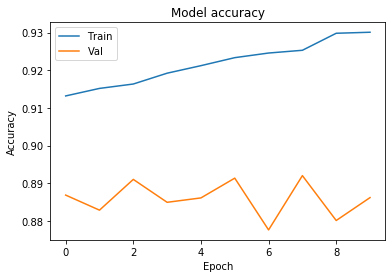

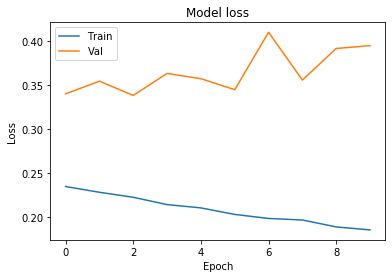

In [54]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### Plot Confusion matrix 

In [55]:
# !pip install mlxtend

In [56]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd519ab6990>)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


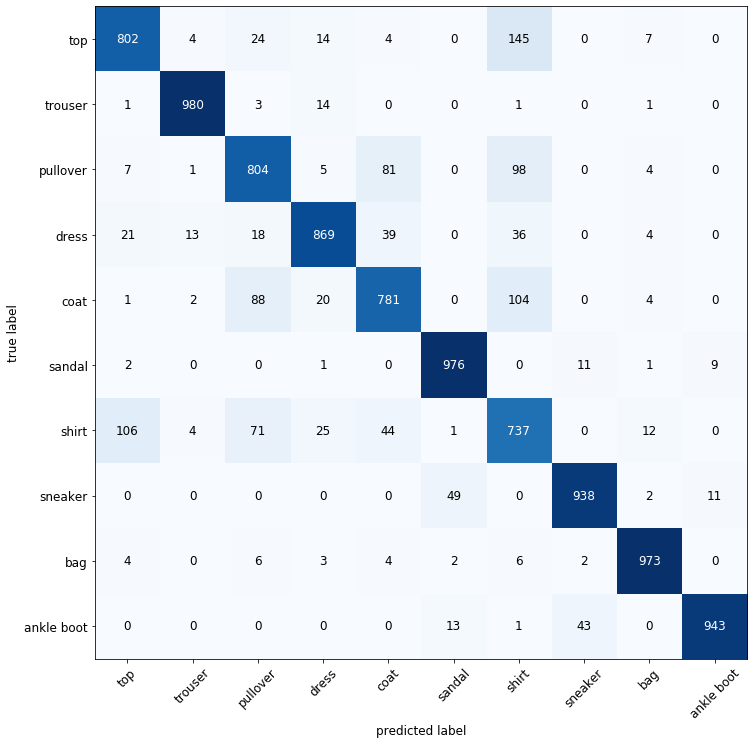

In [57]:
font = {
    'family': 'Times New Roman',
    'size': 12
}
matplotlib.rc('font', **font)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(12, 12), class_names = class_names, show_normed=False)

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd5199885d0>)

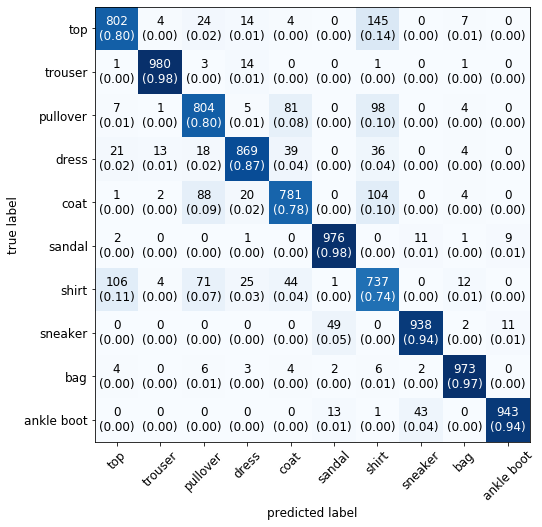

In [58]:
# font = {
#     'family': 'Times New Roman',
#     'size': 16
# }
# matplotlib.rc('font', **font)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(8, 8), class_names = class_names, show_normed=True)